# ASSIGNMENT 13: LGBM & XGBM

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score 

In [5]:
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

# Exploratory Data Analysis

In [6]:
train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [7]:
test_data

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* <b> Histogram </b>

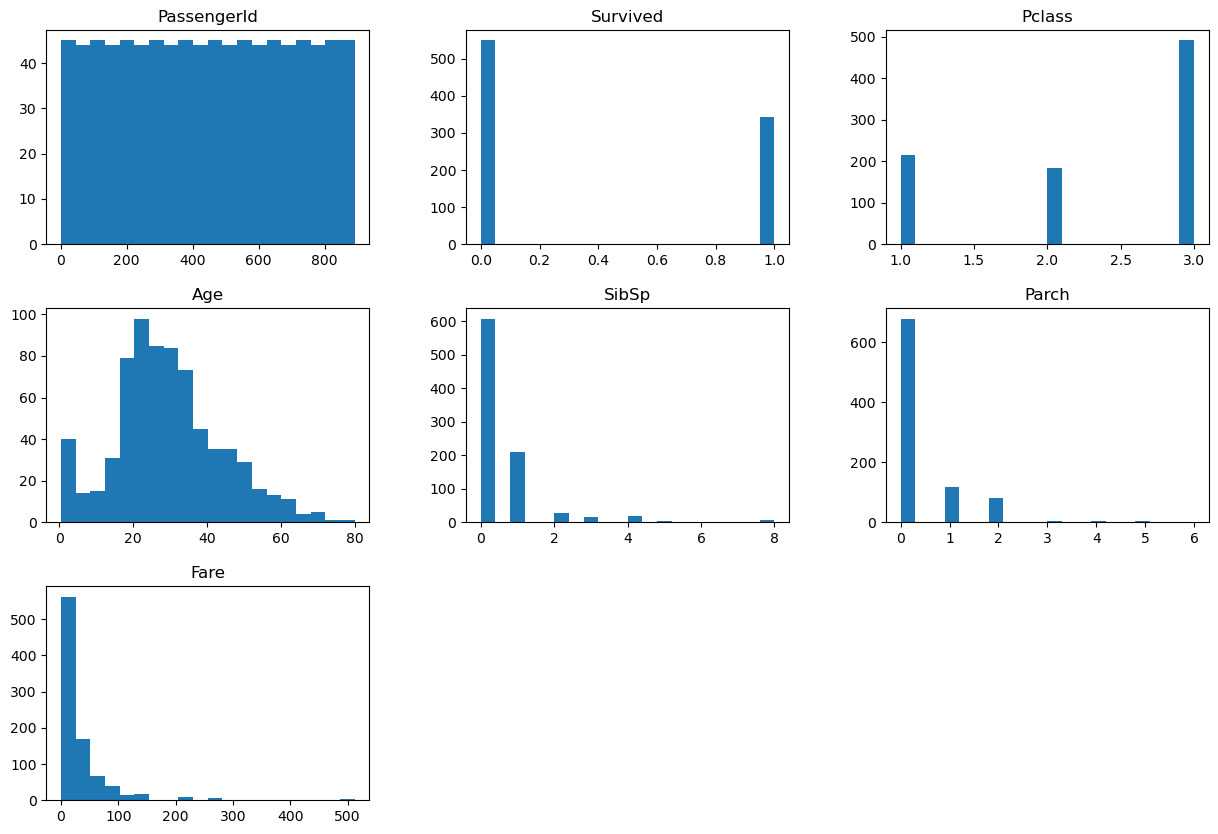

In [11]:
train_data.hist(bins=20, figsize=(15,10), grid=False)
plt.show()

* <b> Box Plot

<Axes: >

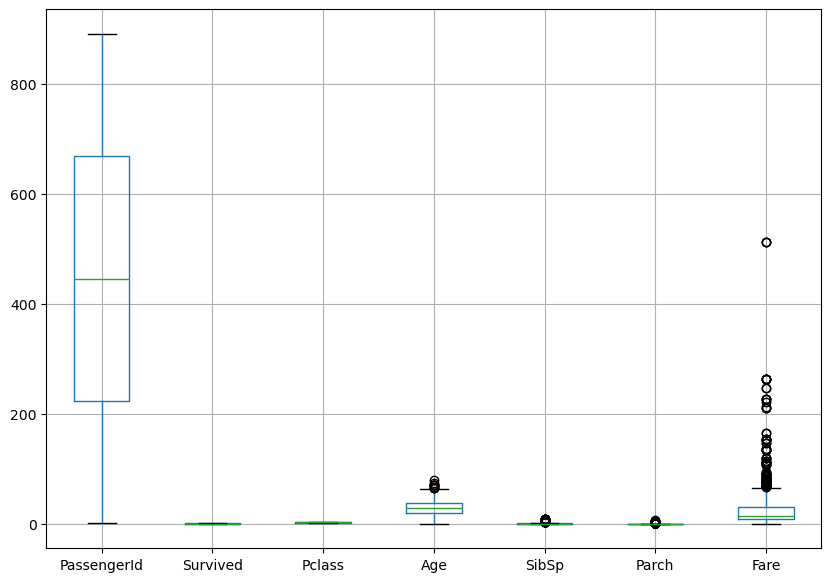

In [12]:
plt.figure(figsize=(10,7))
train_data.boxplot()

* <b> Pair Plot

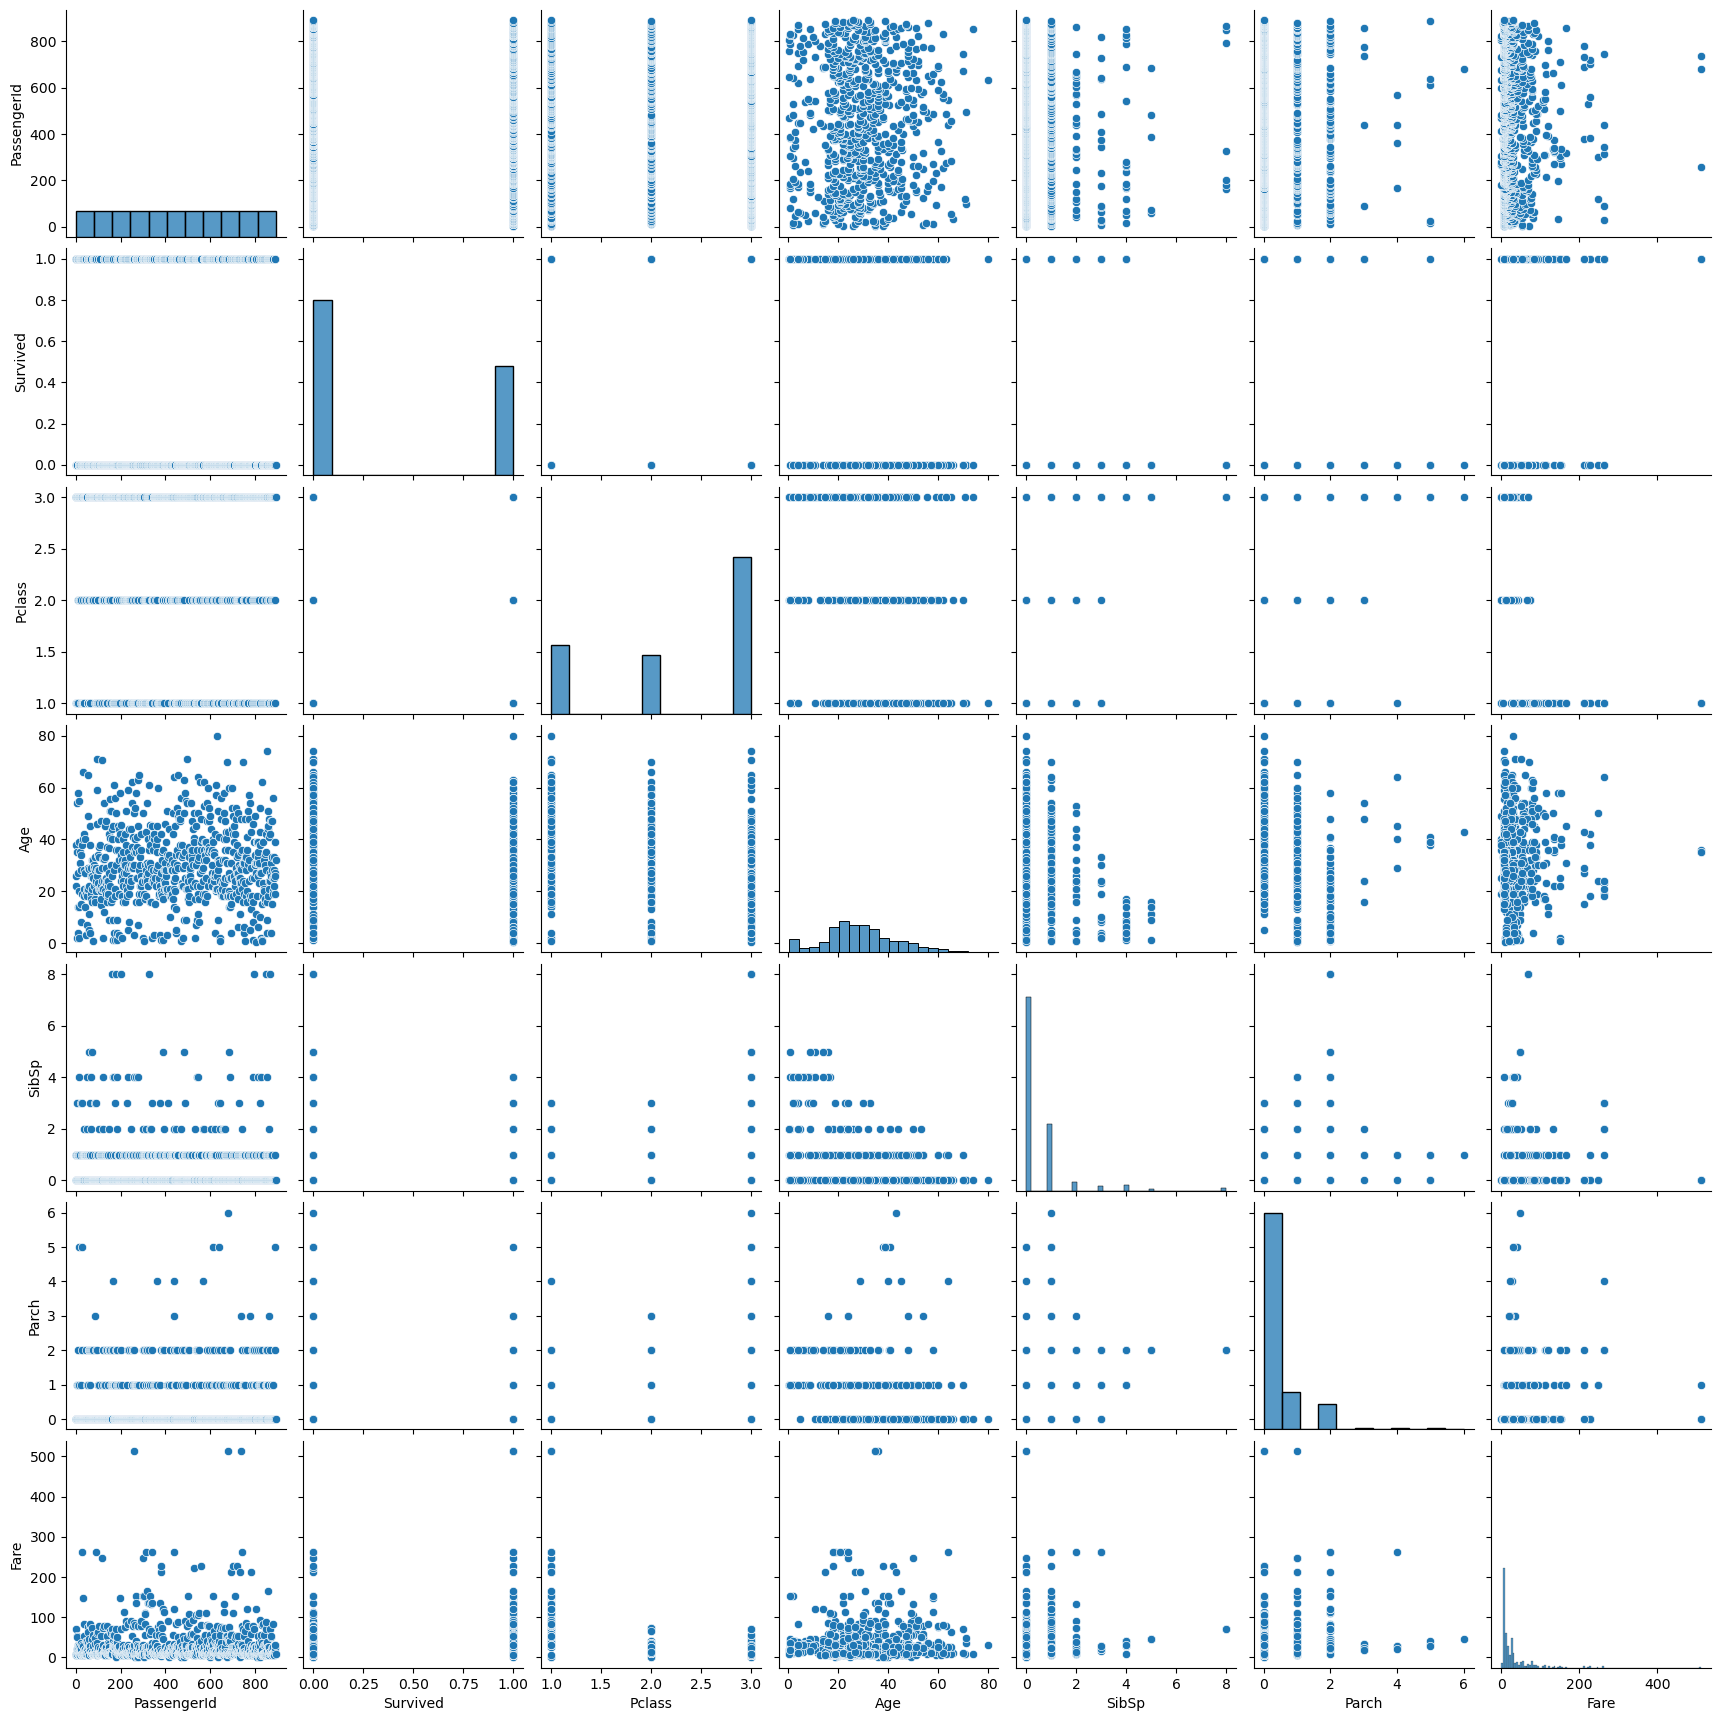

In [13]:
sns.pairplot(train_data)

# Data Preprocessing

In [ ]:
# imputing the missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode())

In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train_data.drop(['Name','Ticket'], axis=1, inplace=True)
test_data.drop(['Name','Ticket'], axis=1, inplace=True)

In [16]:
train_data

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0              1         0       3    male  22.0      1      0   7.2500   NaN   
1              2         1       1  female  38.0      1      0  71.2833   C85   
2              3         1       3  female  26.0      0      0   7.9250   NaN   
3              4         1       1  female  35.0      1      0  53.1000  C123   
4              5         0       3    male  35.0      0      0   8.0500   NaN   
..           ...       ...     ...     ...   ...    ...    ...      ...   ...   
886          887         0       2    male  27.0      0      0  13.0000   NaN   
887          888         1       1  female  19.0      0      0  30.0000   B42   
888          889         0       3  female   NaN      1      2  23.4500   NaN   
889          890         1       1    male  26.0      0      0  30.0000  C148   
890          891         0       3    male  32.0      0      0   7.7500   NaN   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[891 rows x 10 columns]

In [18]:
label_en = LabelEncoder()

In [19]:
train_data['Cabin'] = label_en.fit_transform(train_data['Cabin'])
test_data['Cabin'] = label_en.fit_transform(test_data['Cabin'])

In [20]:
train_data

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

     Cabin Embarked  
0      147        S  
1       81        C  
2      147        S  
3       55        S  
4      147        S  
..     ...      ...  
886    147        S  
887     30        S  
888    147        S  
889     60        C  
890    147        Q  

[891 rows x 10 columns]

In [21]:
dum = pd.get_dummies(train_data[['Sex', 'Embarked']])
dumm = pd.get_dummies(test_data[['Sex', 'Embarked']])

In [24]:
train_data.drop(['Sex','Embarked'], axis=1, inplace=True)
test_data.drop(['Sex','Embarked'], axis=1, inplace=True)

In [25]:
train_data

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Cabin
0              1         0       3  22.0      1      0   7.2500    147
1              2         1       1  38.0      1      0  71.2833     81
2              3         1       3  26.0      0      0   7.9250    147
3              4         1       1  35.0      1      0  53.1000     55
4              5         0       3  35.0      0      0   8.0500    147
..           ...       ...     ...   ...    ...    ...      ...    ...
886          887         0       2  27.0      0      0  13.0000    147
887          888         1       1  19.0      0      0  30.0000     30
888          889         0       3   NaN      1      2  23.4500    147
889          890         1       1  26.0      0      0  30.0000     60
890          891         0       3  32.0      0      0   7.7500    147

[891 rows x 8 columns]

In [26]:
test_data

PassengerId  Pclass   Age  SibSp  Parch      Fare  Cabin
0            892       3  34.5      0      0    7.8292     76
1            893       3  47.0      1      0    7.0000     76
2            894       2  62.0      0      0    9.6875     76
3            895       3  27.0      0      0    8.6625     76
4            896       3  22.0      1      1   12.2875     76
..           ...     ...   ...    ...    ...       ...    ...
413         1305       3   NaN      0      0    8.0500     76
414         1306       1  39.0      0      0  108.9000     22
415         1307       3  38.5      0      0    7.2500     76
416         1308       3   NaN      0      0    8.0500     76
417         1309       3   NaN      1      1   22.3583     76

[418 rows x 7 columns]

In [27]:
df = train_data.join(dum, how='left')
df1 = test_data.join(dumm, how='left')

In [28]:
df

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Cabin  \
0              1         0       3  22.0      1      0   7.2500    147   
1              2         1       1  38.0      1      0  71.2833     81   
2              3         1       3  26.0      0      0   7.9250    147   
3              4         1       1  35.0      1      0  53.1000     55   
4              5         0       3  35.0      0      0   8.0500    147   
..           ...       ...     ...   ...    ...    ...      ...    ...   
886          887         0       2  27.0      0      0  13.0000    147   
887          888         1       1  19.0      0      0  30.0000     30   
888          889         0       3   NaN      1      2  23.4500    147   
889          890         1       1  26.0      0      0  30.0000     60   
890          891         0       3  32.0      0      0   7.7500    147   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         False      True       False       False        True  
1          True     False        True       False       False  
2          True     False       False       False        True  
3          True     False       False       False        True  
4         False      True       False       False        True  
..          ...       ...         ...         ...         ...  
886       False      True       False       False        True  
887        True     False       False       False        True  
888        True     False       False       False        True  
889       False      True        True       False       False  
890       False      True       False        True       False  

[891 rows x 13 columns]

In [30]:
df1

PassengerId  Pclass   Age  SibSp  Parch      Fare  Cabin  Sex_female  \
0            892       3  34.5      0      0    7.8292     76       False   
1            893       3  47.0      1      0    7.0000     76        True   
2            894       2  62.0      0      0    9.6875     76       False   
3            895       3  27.0      0      0    8.6625     76       False   
4            896       3  22.0      1      1   12.2875     76        True   
..           ...     ...   ...    ...    ...       ...    ...         ...   
413         1305       3   NaN      0      0    8.0500     76       False   
414         1306       1  39.0      0      0  108.9000     22        True   
415         1307       3  38.5      0      0    7.2500     76       False   
416         1308       3   NaN      0      0    8.0500     76       False   
417         1309       3   NaN      1      1   22.3583     76       False   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0        True       False        True       False  
1       False       False       False        True  
2        True       False        True       False  
3        True       False       False        True  
4       False       False       False        True  
..        ...         ...         ...         ...  
413      True       False       False        True  
414     False        True       False       False  
415      True       False       False        True  
416      True       False       False        True  
417      True        True       False       False  

[418 rows x 12 columns]

# Building Predictive Models:

In [32]:
features = df.drop(['Survived'], axis=1)
target = df['Survived']
features

PassengerId  Pclass   Age  SibSp  Parch     Fare  Cabin  Sex_female  \
0              1       3  22.0      1      0   7.2500    147       False   
1              2       1  38.0      1      0  71.2833     81        True   
2              3       3  26.0      0      0   7.9250    147        True   
3              4       1  35.0      1      0  53.1000     55        True   
4              5       3  35.0      0      0   8.0500    147       False   
..           ...     ...   ...    ...    ...      ...    ...         ...   
886          887       2  27.0      0      0  13.0000    147       False   
887          888       1  19.0      0      0  30.0000     30        True   
888          889       3   NaN      1      2  23.4500    147        True   
889          890       1  26.0      0      0  30.0000     60       False   
890          891       3  32.0      0      0   7.7500    147       False   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0        True       False       False        True  
1       False        True       False       False  
2       False       False       False        True  
3       False       False       False        True  
4        True       False       False        True  
..        ...         ...         ...         ...  
886      True       False       False        True  
887     False       False       False        True  
888     False       False       False        True  
889      True        True       False       False  
890      True       False        True       False  

[891 rows x 12 columns]

In [33]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2, random_state=42)

In [35]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# LGBM (LightGB Model)

In [37]:
import lightgbm as lgb

In [38]:
model = lgb.LGBMClassifier()

In [39]:
model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 488
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier()

In [40]:
y_pred = model.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred)

0.7932960893854749

In [43]:
print("Classification Report:",classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# XGBoost

In [44]:
from xgboost import XGBClassifier

In [45]:
model2 = XGBClassifier()

In [46]:
model2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [49]:
y_preds = model2.predict(x_test)
print("Classification Report:", classification_report(y_test,y_preds))

Classification Report:               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [51]:
params = {'learning_rate':[0.2,0.3,0.4,0.5], 'max_depth':[2,3,4,5], 'min_child_weight':[2,3,4,5], 'n_estimators':[80,60,70,90]}

In [52]:
grid = GridSearchCV(lgb.LGBMClassifier(), params, scoring='accuracy')
grid.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [2, 3, 4, 5],
                         'n_estimators': [80, 60, 70, 90]},
             scoring='accuracy')

In [53]:
print(grid.best_params_)

{'learning_rate': 0.2, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 60}


In [54]:
import xgboost as xgb

In [55]:
param = {
    'max_depth' : [3, 5],
    'learning_rate' : [0.1, 0.01],
    'n_estimator' : [50, 100]
}
grid_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric = 'logloss'), param, cv=3, scoring='accuracy')
grid_xgb.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimator': [50, 100]},
             scoring='accuracy')

In [56]:
print(grid_xgb.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimator': 50}


# Comparative Analysis:

In [57]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [58]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [59]:
lgb_accuracy=accuracy_score(y_test,y_pred)*100
lgb_precision=precision_score(y_test,y_pred)*100
lgb_recall=recall_score(y_test,y_pred)*100
lgb_f1score=f1_score(y_test,y_pred)*100

In [60]:
xgb_accuracy=accuracy_score(y_test,y_preds)*100
xgb_precision=precision_score(y_test,y_preds)*100
xgb_recall=recall_score(y_test,y_preds)*100
xgb_f1score=f1_score(y_test,y_preds)*100

In [61]:
metrics={
    'Metrics':['Accuracy','Precision','Recall','F1'],
    'LGBoost':[lgb_accuracy,lgb_precision,lgb_recall,lgb_f1score],
    'XGBoost':[xgb_accuracy,xgb_precision,xgb_recall,xgb_f1score]
}

In [62]:
metrics_df=pd.DataFrame(metrics)
metrics_df

Metrics    LGBoost    XGBoost
0   Accuracy  79.329609  79.888268
1  Precision  77.611940  77.142857
2     Recall  70.270270  72.972973
3         F1  73.758865  75.000000

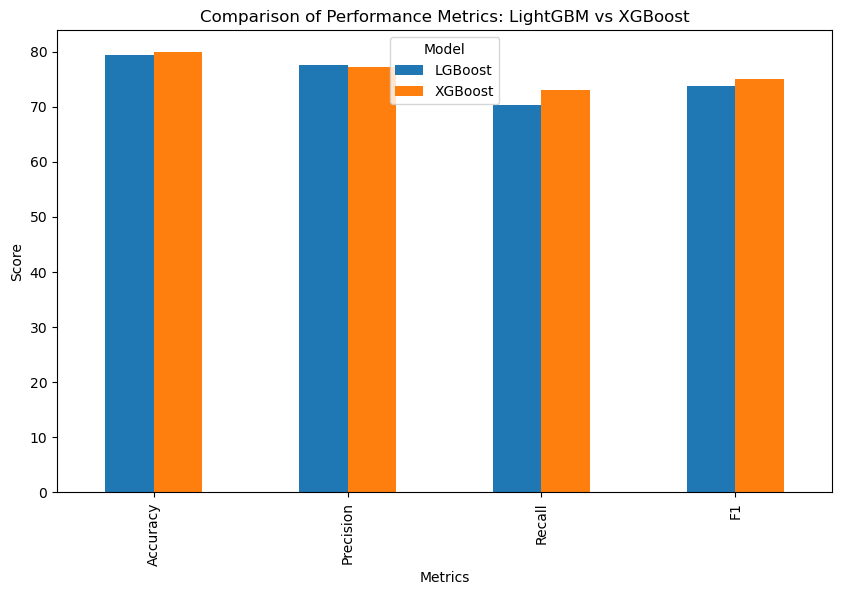

In [63]:
#Visualizations between LightGBM and XGBoost
metrics_df.plot(x='Metrics', kind='bar', figsize=(10, 6))
plt.title("Comparison of Performance Metrics: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.legend(title="Model")
plt.show()